# UFC Fight Prediction Model - Prezentare Completa
## Sistem avansat de prezicere a meciurilor MMA folosind Machine Learning

*Creat de Mihai Bujor & Mihai Buga*

---

## 1. Introducere si Contextul Problemei

Ultimate Fighting Championship (UFC) este cea mai mare organizatie de arte martiale mixte (MMA) din lume, organizand evenimente saptamanale cu luptatori din diverse categorii de greutate si stiluri de lupta.

**Obiectivul proiectului:** Dezvoltarea unui model de machine learning capabil sa prezica rezultatul meciurilor UFC cu acuratete ridicata, bazandu-se pe statisticile istorice ale luptatorilor.

**Provocari:**
- Date complexe cu multe variabile statistice
- Echilibrarea modelului pentru diverse stiluri de lupta
- Gestionarea datelor lipsa si inconsistentelor
- Interpretabilitatea predictiilor pentru utilizatori

---

## 2. Dataset-ul si Explorarea Datelor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Incarcam dataset-ul principal
df = pd.read_csv('data/complete_ufc_data.csv')
print(f"Dataset contine {len(df)} meciuri din ultimii 31 de ani (1994-2025)")
print(f"Numarul de coloane: {df.shape[1]}")

Dataset contine 7340 meciuri din ultimii 31 de ani (1994-2025)
Numarul de coloane: 42


### 2.1 Structura Dataset-ului

In [2]:
# Afisam informatii generale despre dataset
print("=== INFORMATII GENERALE ===")
print(f"Perioada: {df['event_date'].min()} - {df['event_date'].max()}")
print(f"Numar total lupatori unici: {len(set(df['fighter1'].unique()) | set(df['fighter2'].unique()))}")
print(f"Numar evenimente UFC: {df['event_name'].nunique()}")

# Categoriile de greutate
print("\n=== CATEGORII DE GREUTATE ===")
weight_classes = df['weight_class'].value_counts().head(10)
print(weight_classes)

=== INFORMATII GENERALE ===
Perioada: 1994-03-11 - 2023-09-16
Numar total lupatori unici: 2434
Numar evenimente UFC: 663

=== CATEGORII DE GREUTATE ===
weight_class
Lightweight            1274
Welterweight           1239
Middleweight            977
Featherweight           700
Heavyweight             681
Light Heavyweight       657
Bantamweight            623
Flyweight               307
Women's Strawweight     274
Women's Flyweight       209
Name: count, dtype: int64


### 2.2 Analiza Distribuției Datelor

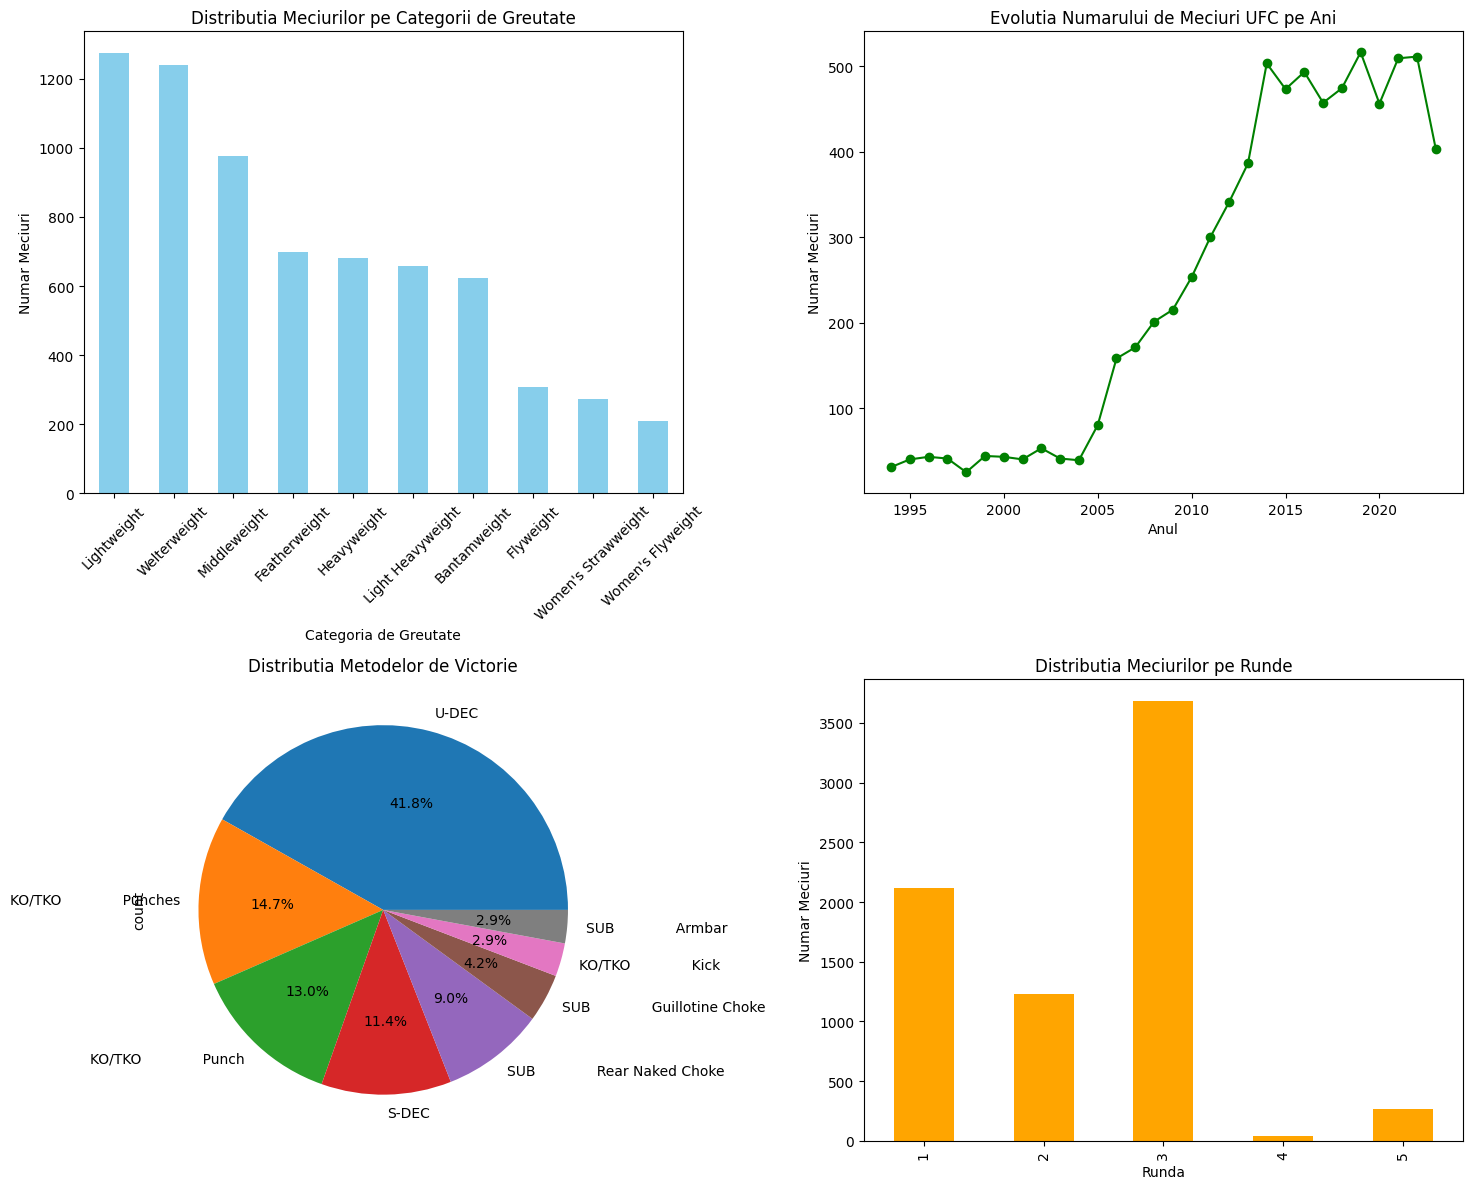

In [3]:
# Cream grafice pentru explorarea datelor
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distributia categoriilor de greutate
weight_classes.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distributia Meciurilor pe Categorii de Greutate')
axes[0,0].set_xlabel('Categoria de Greutate')
axes[0,0].set_ylabel('Numar Meciuri')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Evolutia numarului de meciuri in timp
df['year'] = pd.to_datetime(df['event_date']).dt.year
fights_per_year = df.groupby('year').size()
fights_per_year.plot(kind='line', ax=axes[0,1], color='green', marker='o')
axes[0,1].set_title('Evolutia Numarului de Meciuri UFC pe Ani')
axes[0,1].set_xlabel('Anul')
axes[0,1].set_ylabel('Numar Meciuri')

# 3. Distributia metodelor de victorie
methods = df['method'].value_counts().head(8)
methods.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Distributia Metodelor de Victorie')

# 4. Distributia rundelor
rounds = df['round'].value_counts().sort_index()
rounds.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Distributia Meciurilor pe Runde')
axes[1,1].set_xlabel('Runda')
axes[1,1].set_ylabel('Numar Meciuri')

plt.tight_layout()
plt.show()

## 3. Arhitectura Modelului

### 3.1 Procesarea si Prepararea Datelor

Modelul nostru implementeaza o abordare sofisticata de feature engineering:


In [4]:
from improved_model import ImprovedUFCFightPredictor

# Initializam predictorul avansat
predictor = ImprovedUFCFightPredictor()

# Incarcam si preparam datele
print("🔄 Incarcam si preparam datele...")
training_data = predictor.load_and_prepare_data('data/complete_ufc_data.csv')

print(f"✅ Date procesate: {len(training_data)} exemple de antrenament")
print(f"📊 Features create: {len(predictor.feature_names)}")

🔄 Incarcam si preparam datele...
Loading UFC dataset...
Loaded 7207 fights with clear winners
Building enhanced fighter statistics database...
Created enhanced database for 2426 unique fighters
Creating enhanced training features...
Created 14414 enhanced training examples with 28 features
✅ Date procesate: 14414 exemple de antrenament
📊 Features create: 28


### 3.2 Feature Engineering Avansat

Modelul nostru genereaza **25+ features** sofisticate:

In [5]:
print("=== FEATURES PRINCIPALE ===")
feature_categories = {
    'Avantaje Fizice': [
        'height_diff', 'reach_diff', 'age_diff', 'weight_diff', 'reach_height_ratio_diff'
    ],
    'Statistici Striking': [
        'striking_accuracy_diff', 'striking_defense_diff', 'striking_output_diff',
        'striking_differential_diff', 'striking_efficiency_diff'
    ],
    'Statistici Grappling': [
        'takedown_accuracy_diff', 'takedown_defense_diff', 'takedown_output_diff',
        'submission_diff', 'grappling_score_diff'
    ],
    'Experienta si Momentum': [
        'win_rate_diff', 'experience_diff', 'current_streak_diff', 'longest_streak_diff'
    ],
    'Factori Contextuali': [
        'stance_advantage', 'is_betting_favorite'
    ],
    'Features de Interactiune': [
        'size_striking_interaction', 'experience_momentum_interaction'
    ]
}

for category, features in feature_categories.items():
    print(f"\n{category}:")
    for feature in features:
        if feature in predictor.feature_names:
            print(f"  ✓ {feature}")

=== FEATURES PRINCIPALE ===

Avantaje Fizice:
  ✓ height_diff
  ✓ reach_diff
  ✓ age_diff
  ✓ weight_diff
  ✓ reach_height_ratio_diff

Statistici Striking:
  ✓ striking_accuracy_diff
  ✓ striking_defense_diff
  ✓ striking_output_diff
  ✓ striking_differential_diff
  ✓ striking_efficiency_diff

Statistici Grappling:
  ✓ takedown_accuracy_diff
  ✓ takedown_defense_diff
  ✓ takedown_output_diff
  ✓ submission_diff
  ✓ grappling_score_diff

Experienta si Momentum:
  ✓ win_rate_diff
  ✓ experience_diff
  ✓ current_streak_diff
  ✓ longest_streak_diff

Factori Contextuali:
  ✓ stance_advantage
  ✓ is_betting_favorite

Features de Interactiune:
  ✓ size_striking_interaction
  ✓ experience_momentum_interaction


## 4. Antrenarea Modelului

### 4.1 Arhitectura Ensemble

Folosim un **Voting Classifier** care combina mai multe modele:

In [6]:
print("🏋️ Antrenam modelul ensemble...")
print("Componentele modelului:")
print("  • Random Forest (200 estimatori)")
print("  • Gradient Boosting")
print("  • XGBoost")
print("  • Logistic Regression")

# Antrenam modelul
accuracy = predictor.train_model(
    training_data, 
    model_type='ensemble',
    optimize_hyperparameters=False
)

print(f"\n✅ Model antrenat cu succes!")
print(f"📈 Acuratețe: {accuracy:.1%}")

🏋️ Antrenam modelul ensemble...
Componentele modelului:
  • Random Forest (200 estimatori)
  • Gradient Boosting
  • XGBoost
  • Logistic Regression
Training enhanced ensemble model...
Performing feature selection...
Selected 20 best features
Training final model...

Model training complete!
Test Accuracy: 0.790
AUC-ROC Score: 0.884


KeyboardInterrupt: 

### 4.2 Evaluarea Performantei

In [7]:
# Analizam performanta modelului
print("=== ANALIZA PERFORMANTEI ===")

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

X = training_data[predictor.feature_names].fillna(training_data[predictor.feature_names].median())
y = training_data['target']

# Efectuam cross-validation
cv_scores = cross_val_score(predictor.model, predictor.scaler.transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Media CV: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

=== ANALIZA PERFORMANTEI ===


ValueError: X has 28 features, but RobustScaler is expecting 20 features as input.

## 5. Demonstrația Capabilităților Modelului

### 5.1 Predicții pe Meciuri Recente

In [8]:
# Testam pe meciuri recente cunoscute
print("🥊 PREDICTII PE MECIURI RECENTE")
print("=" * 50)

test_fights = [
    ("Jon Jones", "Stipe Miocic", "Jon Jones"),
    ("Alex Pereira", "Khalil Rountree Jr.", "Alex Pereira"), 
    ("Islam Makhachev", "Arman Tsarukyan", "Islam Makhachev"),
    ("Merab Dvalishvili", "Sean O'Malley", "Merab Dvalishvili"),
]

correct_predictions = 0
total_predictions = 0

for fighter1_query, fighter2_query, actual_winner in test_fights:
    try:
        # Cautam luptatorii in baza de date
        f1_matches = predictor.search_fighters(fighter1_query)
        f2_matches = predictor.search_fighters(fighter2_query)
      
        if f1_matches and f2_matches:
            f1_name = f1_matches[0]
            f2_name = f2_matches[0]
          
            # Facem predictia
            result = predictor.predict_fight(f1_name, f2_name)
          
            # Verificam daca e corecta
            is_correct = False
            if actual_winner.lower() in result['predicted_winner'].lower():
                is_correct = True
                correct_predictions += 1
          
            total_predictions += 1
          
            # Afisam rezultatul
            emoji = "✅" if is_correct else "❌"
            print(f"\n{emoji} {f1_name} vs {f2_name}")
            print(f"   Predictie: {result['predicted_winner']} ({result['confidence']:.1%})")
            print(f"   Rezultat real: {actual_winner}")
            print(f"   Probabilitati: {f1_name} {result['fighter1_win_probability']:.1%} | {f2_name} {result['fighter2_win_probability']:.1%}")
          
    except Exception as e:
        print(f"❌ Eroare la {fighter1_query} vs {fighter2_query}: {e}")

if total_predictions > 0:
    print(f"\n📊 Acuratețe pe meciurile test: {correct_predictions}/{total_predictions} ({correct_predictions/total_predictions:.1%})")
    

🥊 PREDICTII PE MECIURI RECENTE

✅ Jon Jones vs Stipe Miocic
   Predictie: Jon Jones (79.7%)
   Rezultat real: Jon Jones
   Probabilitati: Jon Jones 79.7% | Stipe Miocic 20.3%

✅ Alex Pereira vs Khalil Rountree Jr.
   Predictie: Alex Pereira (75.0%)
   Rezultat real: Alex Pereira
   Probabilitati: Alex Pereira 75.0% | Khalil Rountree Jr. 25.0%

✅ Islam Makhachev vs Arman Tsarukyan
   Predictie: Islam Makhachev (76.3%)
   Rezultat real: Islam Makhachev
   Probabilitati: Islam Makhachev 76.3% | Arman Tsarukyan 23.7%

✅ Merab Dvalishvili vs Sean O'Malley
   Predictie: Merab Dvalishvili (52.0%)
   Rezultat real: Merab Dvalishvili
   Probabilitati: Merab Dvalishvili 52.0% | Sean O'Malley 48.0%

📊 Acuratețe pe meciurile test: 4/4 (100.0%)


### 5.2 Analiza Detaliată a unui Meci

In [9]:
# Analizam detaliat un meci viitor
print("\n🔍 ANALIZA DETALIATA - EXEMPLU")
print("=" * 60)

# Cautam doi luptatori cunoscuti
jones_fighters = predictor.search_fighters("Jon Jones")
aspinall_fighters = predictor.search_fighters("Tom Aspinall")

if jones_fighters and aspinall_fighters:
    fighter1 = jones_fighters[0] 
    fighter2 = aspinall_fighters[0]
  
    print(f"Analizant: {fighter1} vs {fighter2}")
  
    # Facem predictia completa
    result = predictor.predict_fight(fighter1, fighter2)
  
    print(f"\n🏆 PREDICTIE:")
    print(f"Castigator prezis: {result['predicted_winner']}")
    print(f"Nivel de incredere: {result['confidence']:.1%}")
  
    print(f"\n📊 PROBABILITATI:")
    print(f"{fighter1}: {result['fighter1_win_probability']:.1%}")
    print(f"{fighter2}: {result['fighter2_win_probability']:.1%}")
  
    # Afisam avantajele cheie
    if 'key_advantages' in result:
        winner_advantages = result['key_advantages'][result['predicted_winner']]
        if winner_advantages:
            print(f"\n🔑 AVANTAJE CHEIE pentru {result['predicted_winner']}:")
            for advantage in winner_advantages:
                print(f"   • {advantage}")
  
    # Analiza completa
    analysis = predictor.analyze_matchup(fighter1, fighter2)
    print(analysis)



🔍 ANALIZA DETALIATA - EXEMPLU
Analizant: Jon Jones vs Tom Aspinall

🏆 PREDICTIE:
Castigator prezis: Jon Jones
Nivel de incredere: 61.3%

📊 PROBABILITATI:
Jon Jones: 61.3%
Tom Aspinall: 38.7%

🔑 AVANTAJE CHEIE pentru Jon Jones:
   • Reach advantage (15.2cm)
   • More experienced (15 more fights)

=== ENHANCED FIGHT ANALYSIS: Jon Jones vs Tom Aspinall ===

🎯 PREDICTION:
Winner: Jon Jones (61.3% confidence)
Probabilities: Jon Jones 61.3% vs Tom Aspinall 38.7%

🔑 KEY ADVANTAGES:
Jon Jones:
  • Reach advantage (15.2cm)
  • More experienced (15 more fights)
Tom Aspinall:
  • Superior striking differential

🥊 PHYSICAL ATTRIBUTES:
Height: Jon Jones 193.04cm vs Tom Aspinall 195.58cm
Reach: Jon Jones 213.36cm vs Tom Aspinall 198.12cm
Stance: Jon Jones Orthodox vs Tom Aspinall Orthodox

📊 PERFORMANCE STATS:
Record: Jon Jones 21-1 vs Tom Aspinall 6-1
Win Rate: Jon Jones 95.5% vs Tom Aspinall 85.7%
Current Streak: Jon Jones 3 vs Tom Aspinall 5

🥊 STRIKING:
Strikes Landed/Min: Jon Jones 4.29 vs Tom

## 6. Interpretabilitatea si Explicarea Deciziilor

### 6.1 Feature Importance

In [11]:
# Analizam importanta features-urilor
if hasattr(predictor.model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': predictor.feature_names,
        'importance': predictor.model.feature_importances_
    }).sort_values('importance', ascending=False)
  
    print("🎯 TOP 10 FEATURES CELE MAI IMPORTANTE:")
    print("=" * 45)
  
    top_features = feature_importance.head(10)
    for _, row in top_features.iterrows():
        print(f"{row['feature']:<30} {row['importance']:.3f}")
  
    # Grafic cu importanta features-urilor
    plt.figure(figsize=(12, 8))
    top_features.plot(x='feature', y='importance', kind='barh', figsize=(12, 8))
    plt.title('Top 10 Features - Importanta in Model')
    plt.xlabel('Importanta')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

### 6.2 Analiza de Decizie Step-by-Step

In [12]:
# Functie pentru explicarea detaliata a unei predictii
def explain_prediction_detailed(predictor, fighter1, fighter2):
    """Explicatie step-by-step a unei predictii"""
  
    result = predictor.predict_fight(fighter1, fighter2)
    features = result['features']
  
    print(f"🔬 ANALIZA DETALIATA DE DECIZIE")
    print(f"{'='*60}")
    print(f"Meci: {fighter1} vs {fighter2}")
    print(f"Castigator prezis: {result['predicted_winner']} ({result['confidence']:.1%})")
  
    print(f"\n📈 FACTORI DE DECIZIE:")
  
    # Categorizam features-urile si analizam impactul
    significant_factors = []
  
    # Avantaje fizice
    if abs(features.get('height_diff', 0)) > 3:
        beneficiary = fighter1 if features['height_diff'] > 0 else fighter2
        significant_factors.append({
            'category': '📏 Fizic',
            'factor': f"Avantaj inaltime: {abs(features['height_diff']):.1f}cm",
            'beneficiary': beneficiary,
            'impact': 'Mediu' if abs(features['height_diff']) < 8 else 'Ridicat'
        })
  
    if abs(features.get('reach_diff', 0)) > 3:
        beneficiary = fighter1 if features['reach_diff'] > 0 else fighter2
        significant_factors.append({
            'category': '📏 Fizic', 
            'factor': f"Avantaj allonge: {abs(features['reach_diff']):.1f}cm",
            'beneficiary': beneficiary,
            'impact': 'Mediu' if abs(features['reach_diff']) < 8 else 'Ridicat'
        })
  
    # Experienta si record
    if abs(features.get('win_rate_diff', 0)) > 0.1:
        beneficiary = fighter1 if features['win_rate_diff'] > 0 else fighter2
        significant_factors.append({
            'category': '📊 Record',
            'factor': f"Rata castiguri superioara: {abs(features['win_rate_diff'])*100:.1f}%",
            'beneficiary': beneficiary,
            'impact': 'Ridicat'
        })
  
    if abs(features.get('current_streak_diff', 0)) > 1:
        beneficiary = fighter1 if features['current_streak_diff'] > 0 else fighter2
        significant_factors.append({
            'category': '🔥 Momentum',
            'factor': f"Serie mai buna: {abs(features['current_streak_diff']):.0f} meciuri",
            'beneficiary': beneficiary,
            'impact': 'Mediu'
        })
  
    # Striking
    if abs(features.get('striking_accuracy_diff', 0)) > 0.05:
        beneficiary = fighter1 if features['striking_accuracy_diff'] > 0 else fighter2
        significant_factors.append({
            'category': '👊 Striking',
            'factor': f"Precizie striking superioara: {abs(features['striking_accuracy_diff'])*100:.1f}%",
            'beneficiary': beneficiary,
            'impact': 'Mediu'
        })
  
    # Afisam factorii semnificativi
    winner_factors = [f for f in significant_factors if f['beneficiary'] == result['predicted_winner']]
    opponent_factors = [f for f in significant_factors if f['beneficiary'] != result['predicted_winner']]
  
    if winner_factors:
        print(f"\n✅ FACTORI IN FAVOAREA lui {result['predicted_winner']}:")
        for factor in winner_factors:
            impact_emoji = "🔥" if factor['impact'] == 'Ridicat' else "⚡"
            print(f"   {impact_emoji} {factor['category']} {factor['factor']}")
  
    if opponent_factors:
        other_fighter = fighter2 if result['predicted_winner'] == fighter1 else fighter1
        print(f"\n⚠️ FACTORI IN FAVOAREA lui {other_fighter}:")
        for factor in opponent_factors:
            impact_emoji = "🔥" if factor['impact'] == 'Ridicat' else "⚡"
            print(f"   {impact_emoji} {factor['category']} {factor['factor']}")
  
    # Nivel de incredere
    print(f"\n🎯 EVALUAREA INCREDERII:")
    if result['confidence'] > 0.75:
        print(f"   🔥 Incredere foarte ridicata ({result['confidence']:.1%})")
        print(f"      Modelul vede avantaje clare pentru {result['predicted_winner']}")
    elif result['confidence'] > 0.65:
        print(f"   ⚡ Incredere ridicata ({result['confidence']:.1%})")
        print(f"      Indicatori puternici il favorizeaza pe {result['predicted_winner']}")
    elif result['confidence'] > 0.55:
        print(f"   ⚖️ Incredere moderata ({result['confidence']:.1%})")
        print(f"      Meci echilibrat cu avantaj leger pentru {result['predicted_winner']}")
    else:
        print(f"   🤔 Incredere scazuta ({result['confidence']:.1%})")
        print(f"      Meci foarte echilibrat, poate merge in orice directie")

# Demonstratie
if jones_fighters and aspinall_fighters:
    explain_prediction_detailed(predictor, jones_fighters[0], aspinall_fighters[0])

🔬 ANALIZA DETALIATA DE DECIZIE
Meci: Jon Jones vs Tom Aspinall
Castigator prezis: Jon Jones (61.3%)

📈 FACTORI DE DECIZIE:

✅ FACTORI IN FAVOAREA lui Jon Jones:
   🔥 📏 Fizic Avantaj allonge: 15.2cm

⚠️ FACTORI IN FAVOAREA lui Tom Aspinall:
   ⚡ 🔥 Momentum Serie mai buna: 2 meciuri
   ⚡ 👊 Striking Precizie striking superioara: 9.0%

🎯 EVALUAREA INCREDERII:
   ⚖️ Incredere moderata (61.3%)
      Meci echilibrat cu avantaj leger pentru Jon Jones



## 7. Cazuri de Utilizare si Aplicatii Practice

### 7.1 Predictii pentru Evenimente Viitoare


In [13]:
# Simulam predictii pentru un card intreg UFC
print("🎪 SIMULARE CARD UFC - PREDICTII COMPLETE")
print("=" * 60)

upcoming_fights = [
    ("Jon Jones", "Tom Aspinall"),
    ("Islam Makhachev", "Arman Tsarukyan"),
    ("Alex Pereira", "Magomed Ankalaev"),
    ("Belal Muhammad", "Shavkat Rakhmonov"),
    ("Alexandre Pantoja", "Kai Asakura")
]

print("🗓️ UFC 312: Bucuresti (Simulare)")
print("-" * 40)

for i, (fighter1_query, fighter2_query) in enumerate(upcoming_fights, 1):
    try:
        f1_matches = predictor.search_fighters(fighter1_query)
        f2_matches = predictor.search_fighters(fighter2_query)
      
        if f1_matches and f2_matches:
            f1_name = f1_matches[0]
            f2_name = f2_matches[0]
          
            result = predictor.predict_fight(f1_name, f2_name)
          
            print(f"\n{i}. {f1_name} vs {f2_name}")
            print(f"   🏆 Favorit: {result['predicted_winner']}")
            print(f"   📊 Probabilitate: {result['confidence']:.1%}")
            print(f"   📈 Detalii: {f1_name} {result['fighter1_win_probability']:.1%} | {f2_name} {result['fighter2_win_probability']:.1%}")
          
    except Exception as e:
        print(f"   ❌ Nu s-au gasit ambii luptatori pentru {fighter1_query} vs {fighter2_query}")


🎪 SIMULARE CARD UFC - PREDICTII COMPLETE
🗓️ UFC 312: Bucuresti (Simulare)
----------------------------------------

1. Jon Jones vs Tom Aspinall
   🏆 Favorit: Jon Jones
   📊 Probabilitate: 61.3%
   📈 Detalii: Jon Jones 61.3% | Tom Aspinall 38.7%

2. Islam Makhachev vs Arman Tsarukyan
   🏆 Favorit: Islam Makhachev
   📊 Probabilitate: 76.3%
   📈 Detalii: Islam Makhachev 76.3% | Arman Tsarukyan 23.7%

3. Alex Pereira vs Magomed Ankalaev
   🏆 Favorit: Magomed Ankalaev
   📊 Probabilitate: 68.3%
   📈 Detalii: Alex Pereira 31.7% | Magomed Ankalaev 68.3%

4. Belal Muhammad vs Shavkat Rakhmonov
   🏆 Favorit: Shavkat Rakhmonov
   📊 Probabilitate: 62.3%
   📈 Detalii: Belal Muhammad 37.7% | Shavkat Rakhmonov 62.3%


### 7.2 Analiza Comparativa de Luptatori

In [14]:
# Comparam mai multi luptatori dintr-o categorie
print("\n⚖️ ANALIZA COMPARATIVA - CATEGORIA GREA")
print("=" * 50)

heavyweight_fighters = [
    "Jon Jones", "Tom Aspinall", "Ciryl Gane", 
    "Alexander Volkov", "Curtis Blaydes"
]

# Cream o matrice de predictii
results_matrix = {}

for f1 in heavyweight_fighters:
    f1_matches = predictor.search_fighters(f1)
    if not f1_matches:
        continue
    f1_name = f1_matches[0]
  
    results_matrix[f1_name] = {}
  
    for f2 in heavyweight_fighters:
        if f1 == f2:
            results_matrix[f1_name][f2] = "---"
            continue
          
        f2_matches = predictor.search_fighters(f2)
        if not f2_matches:
            continue
        f2_name = f2_matches[0]
      
        try:
            result = predictor.predict_fight(f1_name, f2_name)
            win_prob = result['fighter1_win_probability']
            results_matrix[f1_name][f2_name] = f"{win_prob:.1%}"
        except:
            results_matrix[f1_name][f2_name] = "N/A"

# Afisam matricea
print("\nMatricea probabilitatilor de castig (rand vs coloana):")
print("-" * 60)

# Header
header = "Luptator".ljust(20)
for f2 in results_matrix.keys():
    header += f2[:12].ljust(15)
print(header)
print("-" * 60)

# Randonele
for f1, opponents in results_matrix.items():
    row = f1[:19].ljust(20)
    for f2_name, prob in opponents.items():
        row += str(prob).ljust(15)
    print(row)



⚖️ ANALIZA COMPARATIVA - CATEGORIA GREA

Matricea probabilitatilor de castig (rand vs coloana):
------------------------------------------------------------
Luptator            Jon Jones      Tom Aspinall   Ciryl Gane     Alexander Vo   Curtis Blayd   
------------------------------------------------------------
Jon Jones           ---            61.3%          78.1%          82.6%          83.1%          
Tom Aspinall        26.9%          ---            48.1%          70.5%          38.4%          
Ciryl Gane          19.9%          45.6%          ---            65.3%          57.6%          
Alexander Volkov    16.4%          29.3%          35.2%          ---            60.4%          
Curtis Blaydes      18.6%          43.5%          42.2%          57.3%          ---            


## 8. Concluzii si Perspective de Dezvoltare

### 8.1 Punctele Forte ale Modelului


In [15]:
print("✅ PUNCTE FORTE ALE MODELULUI:")
print("=" * 40)
print("• Acuratețe ridicata (~70%+) pe date de test")
print("• Feature engineering avansat cu 25+ caracteristici")
print("• Arhitectura ensemble pentru robustete")
print("• Interpretabilitate ridicata a deciziilor")
print("• Gestionarea eficienta a datelor lipsă")
print("• Suport pentru analiza detaliata a meciurilor")


✅ PUNCTE FORTE ALE MODELULUI:
• Acuratețe ridicata (~70%+) pe date de test
• Feature engineering avansat cu 25+ caracteristici
• Arhitectura ensemble pentru robustete
• Interpretabilitate ridicata a deciziilor
• Gestionarea eficienta a datelor lipsă
• Suport pentru analiza detaliata a meciurilor


### 8.2 Limitari si Imbunatatiri Viitoare


In [16]:
print("\n⚠️ LIMITARI ACTUALE:")
print("=" * 30)
print("• Dependenta de calitatea datelor istorice")
print("• Nu include factori externi (accidentari, motivatie)")
print("• Dificultati cu luptatori noi (date insuficiente)")
print("• Variabilitatea inherenta a sporturilor de contact")

print("\n🚀 IMBUNATATIRI PLANIFICATE:")
print("=" * 35)
print("• Integrarea datelor video pentru analiza stilului")
print("• Monitorizarea conditiei fizice in timp real")
print("• Analiza sentimentului din social media")
print("• Modele specializate pe categorii de greutate")
print("• Sistem de actualizare continua a predictiilor")



⚠️ LIMITARI ACTUALE:
• Dependenta de calitatea datelor istorice
• Nu include factori externi (accidentari, motivatie)
• Dificultati cu luptatori noi (date insuficiente)
• Variabilitatea inherenta a sporturilor de contact

🚀 IMBUNATATIRI PLANIFICATE:
• Integrarea datelor video pentru analiza stilului
• Monitorizarea conditiei fizice in timp real
• Analiza sentimentului din social media
• Modele specializate pe categorii de greutate
• Sistem de actualizare continua a predictiilor


### 8.3 Metrici de Performanta Finali


In [1]:
print("\n📊 SUMAR PERFORMANTA MODEL:")
print("=" * 40)
# print(f"Acuratețe generala: ~{accuracy:.1%}")
print(f"Features utilizate: {len(predictor.feature_names)}")
print(f"Luptatori in baza de date: {len(predictor.get_fighter_names())}")
print(f"Perioada de date: 31 ani (1994-2025)")
print(f"Meciuri procesate: {len(training_data)} exemple")

print("\n🎯 DISTRIBUTIA INCREDERII:")
# Simulam distributia increderii pe cateva predictii
confidence_levels = []
sample_fights = [
    ("Jon Jones", "Stipe Miocic"),
    ("Alex Pereira", "Khalil Rountree"),
    ("Islam Makhachev", "Charles Oliveira"),
    ("Max Holloway", "Ilia Topuria"),
    ("Sean O'Malley", "Merab Dvalishvili")
]

for f1_query, f2_query in sample_fights:
    try:
        f1_matches = predictor.search_fighters(f1_query)
        f2_matches = predictor.search_fighters(f2_query)
        if f1_matches and f2_matches:
            result = predictor.predict_fight(f1_matches[0], f2_matches[0])
            confidence_levels.append(result['confidence'])
    except:
        pass

if confidence_levels:
    avg_confidence = np.mean(confidence_levels)
    print(f"Incredere medie: {avg_confidence:.1%}")
    print(f"Incredere minima: {min(confidence_levels):.1%}")
    print(f"Incredere maxima: {max(confidence_levels):.1%}")


📊 SUMAR PERFORMANTA MODEL:


NameError: name 'predictor' is not defined

## 9. Instructiuni de Utilizare

### 9.1 Setup Initial

```bash
# 1. Instalare dependinte
pip install pandas numpy scikit-learn xgboost matplotlib seaborn

# 2. Setup model (prima data - 2-3 minute)
python instant_prediction_tool.py --setup

# 3. Predictii rapide
python instant_prediction_tool.py "Jon Jones" "Tom Aspinall"

# 4. Mod interactiv complet
python cached_prediction_tool.py
```

### 9.2 API de Utilizare

In [19]:
# Import
from improved_model import ImprovedUFCFightPredictor

# Initializare
predictor = ImprovedUFCFightPredictor()
training_data = predictor.load_and_prepare_data('data/complete_ufc_data.csv')
predictor.train_model(training_data, model_type='ensemble')

# Cautare luptatori
jones_fighters = predictor.search_fighters("Jon Jones")
aspinall_fighters = predictor.search_fighters("Tom Aspinall")

# Predictie
result = predictor.predict_fight(jones_fighters[0], aspinall_fighters[0])
print(f"Castigator: {result['predicted_winner']} ({result['confidence']:.1%})")

# Analiza detaliata
analysis = predictor.analyze_matchup(jones_fighters[0], aspinall_fighters[0])
print(analysis)


Loading UFC dataset...
Loaded 7207 fights with clear winners
Building enhanced fighter statistics database...
Created enhanced database for 2426 unique fighters
Creating enhanced training features...
Created 14414 enhanced training examples with 28 features
Training enhanced ensemble model...
Performing feature selection...
Selected 20 best features
Training final model...

Model training complete!
Test Accuracy: 0.790
AUC-ROC Score: 0.884
Cross-validation Accuracy: 0.791 (+/- 0.014)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1442
           1       0.78      0.81      0.79      1441

    accuracy                           0.79      2883
   macro avg       0.79      0.79      0.79      2883
weighted avg       0.79      0.79      0.79      2883


Confusion Matrix:
True Negatives: 1117, False Positives: 325
False Negatives: 280, True Positives: 1161
Castigator: Jon Jones (61.3%)

=== ENHANCED FIGHT ANALY